Data joining in Pandas

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
student_info = pd.DataFrame({
    'student_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'name': ['John', 'Jane', 'Joe', 'Mary', 'Peter', 'Paul', 'Jill', 'Jack', 'Jen', 'Jenny', 'Jesse', 'Jasmine'],
    'student_subject': ['Math', 'Math', 'Math', 'Math', 'Math', 'Math', 'Math', 'Math', 'Math', 'Math', 'Math', 'Math'],
})

In [25]:
student_results = pd.DataFrame({ 
    'student_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'student_marks': [90, 80, 70, 60, 50, 65, 75, 72, 59, 20],
    'student_result': ['Pass', 'Pass', 'Pass', 'Pass', 'Fail', 'Pass', 'Pass', 'Pass', 'Fail', 'Fail'],
})

In [26]:
student_info

,student_id,name,student_subject
0,1,John,Math
1,2,Jane,Math
2,3,Joe,Math
3,4,Mary,Math
4,5,Peter,Math
5,6,Paul,Math
6,7,Jill,Math
7,8,Jack,Math
8,9,Jen,Math
9,10,Jenny,Math


In [27]:
student_results

,student_id,student_marks,student_result
0,1,90,Pass
1,2,80,Pass
2,3,70,Pass
3,4,60,Pass
4,5,50,Fail
5,6,65,Pass
6,7,75,Pass
7,8,72,Pass
8,9,59,Fail
9,10,20,Fail


In [28]:
InnerJoin = student_info.merge(student_results, on='student_id', how='inner', suffixes=('_info', '_results'))
InnerJoin.head(10)

,student_id,name,student_subject,student_marks,student_result
0,1,John,Math,90,Pass
1,2,Jane,Math,80,Pass
2,3,Joe,Math,70,Pass
3,4,Mary,Math,60,Pass
4,5,Peter,Math,50,Fail
5,6,Paul,Math,65,Pass
6,7,Jill,Math,75,Pass
7,8,Jack,Math,72,Pass
8,9,Jen,Math,59,Fail
9,10,Jenny,Math,20,Fail


In [29]:
InnerJoin = student_info.merge(student_results, on='student_id', how='inner', suffixes=('_info', '_results'))
InnerJoin.loc[InnerJoin['student_result'] == 'Pass',['name','student_marks','student_result']]

,name,student_marks,student_result
0,John,90,Pass
1,Jane,80,Pass
2,Joe,70,Pass
3,Mary,60,Pass
5,Paul,65,Pass
6,Jill,75,Pass
7,Jack,72,Pass


In [30]:
student_info.merge(student_results, on='student_id')

,student_id,name,student_subject,student_marks,student_result
0,1,John,Math,90,Pass
1,2,Jane,Math,80,Pass
2,3,Joe,Math,70,Pass
3,4,Mary,Math,60,Pass
4,5,Peter,Math,50,Fail
5,6,Paul,Math,65,Pass
6,7,Jill,Math,75,Pass
7,8,Jack,Math,72,Pass
8,9,Jen,Math,59,Fail
9,10,Jenny,Math,20,Fail


<AxesSubplot:xlabel='student_id'>

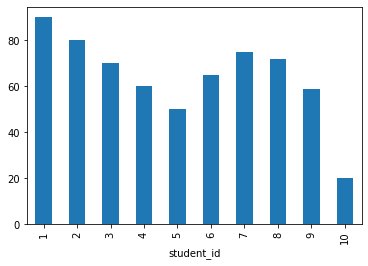

In [31]:
InnerJoin.groupby('student_id')['student_marks'].sum().plot(kind='bar')

In [32]:
student_address = pd.DataFrame({
    'student_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'address': ['1 Main Street', '2 Main Street', '3 Main Street', '4 Main Street', '5 Main Street', '6 Main Street', '7 Main Street', '8 Main Street', '9 Main Street', '10 Main Street'],
})

In [33]:
student_info.merge(student_address, on='student_id') \
    .merge(student_results, on='student_id') 

,student_id,name,student_subject,address,student_marks,student_result
0,1,John,Math,1 Main Street,90,Pass
1,2,Jane,Math,2 Main Street,80,Pass
2,3,Joe,Math,3 Main Street,70,Pass
3,4,Mary,Math,4 Main Street,60,Pass
4,5,Peter,Math,5 Main Street,50,Fail
5,6,Paul,Math,6 Main Street,65,Pass
6,7,Jill,Math,7 Main Street,75,Pass
7,8,Jack,Math,8 Main Street,72,Pass
8,9,Jen,Math,9 Main Street,59,Fail
9,10,Jenny,Math,10 Main Street,20,Fail


**Left Join**

In [37]:
student_info.merge(student_address, on='student_id', how='left') 


,student_id,name,student_subject,address
0,1,John,Math,1 Main Street
1,2,Jane,Math,2 Main Street
2,3,Joe,Math,3 Main Street
3,4,Mary,Math,4 Main Street
4,5,Peter,Math,5 Main Street
5,6,Paul,Math,6 Main Street
6,7,Jill,Math,7 Main Street
7,8,Jack,Math,8 Main Street
8,9,Jen,Math,9 Main Street
9,10,Jenny,Math,10 Main Street
